In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Practice").getOrCreate()
hr = spark.table('default.hr_dataset_1_csv')

In [0]:
hr.show(5)

+--------------------+---------------+-----+----+----------+---+------+-----------+-----------+---------------+--------------------+------------+-------------------+--------------------+-----------------+-------------+--------------------+--------+------------------+--------------------+--------------------+
|       Employee_Name|Employee_Number|State| Zip|       DOB|Age|   Sex|MaritalDesc|CitizenDesc|Hispanic_Latino|            RaceDesc|Date_of_Hire|Date_of_Termination|     Reason_For_Term|Employment_Status|   Department|            Position|Pay_Rate|      Manager_Name|     Employee_Source|   Performance_Score|
+--------------------+---------------+-----+----+----------+---+------+-----------+-----------+---------------+--------------------+------------+-------------------+--------------------+-----------------+-------------+--------------------+--------+------------------+--------------------+--------------------+
|          Brown, Mia|     1103024456|   MA|1450|11/24/1985| 32|Female

In [0]:
selected_columns = hr.select("Employee_Name", "Reason_For_Term", "Department")
selected_columns.show()

+--------------------+--------------------+----------------+
|       Employee_Name|     Reason_For_Term|      Department|
+--------------------+--------------------+----------------+
|          Brown, Mia|N/A - still employed|   Admin Offices|
|LaRotonda, William  |N/A - still employed|   Admin Offices|
|    Steans, Tyrone  |N/A - still employed|   Admin Offices|
|     Howard, Estelle|N/A - still employed|   Admin Offices|
|         Singh, Nan |N/A - still employed|   Admin Offices|
|    Smith, Leigh Ann|       career change|   Admin Offices|
| LeBlanc, Brandon  R|N/A - still employed|   Admin Offices|
|         Quinn, Sean|       career change|   Admin Offices|
|   Boutwell, Bonalyn|N/A - still employed|   Admin Offices|
|   Foster-Baker, Amy|N/A - still employed|   Admin Offices|
|         King, Janet|N/A - still employed|Executive Office|
|    Zamora, Jennifer|N/A - still employed|           IT/IS|
|       Becker, Renee|         performance|           IT/IS|
|       Goble, Taisha|  

In [0]:
from pyspark.sql.functions import col,lit


hr = hr.withColumn("Country",lit("PK"))

In [0]:
select_data = hr.select("Country")

In [0]:
select_data.show(5)

+-------+
|Country|
+-------+
|     PK|
|     PK|
|     PK|
|     PK|
|     PK|
+-------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import col

In [0]:
hr_data = hr.select(col("Country").alias("Count"))

In [0]:
hr_data.show(3)

+-----+
|Count|
+-----+
|   PK|
|   PK|
|   PK|
+-----+
only showing top 3 rows



In [0]:
column_dtypes = hr.dtypes
for column_name,data_type in column_dtypes:
    print(f" Column name :{column_name} Data Type is {data_type}")

 Column name :Employee_Name Data Type is string
 Column name :Employee_Number Data Type is int
 Column name :State Data Type is string
 Column name :Zip Data Type is string
 Column name :DOB Data Type is string
 Column name :Age Data Type is string
 Column name :Sex Data Type is string
 Column name :MaritalDesc Data Type is string
 Column name :CitizenDesc Data Type is string
 Column name :Hispanic_Latino Data Type is string
 Column name :RaceDesc Data Type is string
 Column name :Date_of_Hire Data Type is string
 Column name :Date_of_Termination Data Type is string
 Column name :Reason_For_Term Data Type is string
 Column name :Employment_Status Data Type is string
 Column name :Department Data Type is string
 Column name :Position Data Type is string
 Column name :Pay_Rate Data Type is string
 Column name :Manager_Name Data Type is string
 Column name :Employee_Source Data Type is string
 Column name :Performance_Score Data Type is string
 Column name :Country Data Type is string


In [0]:
hr = hr.withColumn("Employee_Number", col("Employee_Number").cast("integer"))

In [0]:
hr = hr.withColumn("Zip", col("Zip").cast("integer"))

In [0]:
hr = hr.withColumn("Age", col("Age").cast("integer"))

In [0]:
hr = hr.withColumn("Pay_Rate", col("Pay_Rate").cast("integer"))

In [0]:
from pyspark.sql.functions import col, to_date
hr = hr.withColumn("DOB", to_date(col("DOB"),"yyyy-MM-dd"))

In [0]:
hr = hr.withColumn("Date_of_Hire", to_date(col("Date_of_Hire"),"yyyy-MM-dd"))

In [0]:
hr = hr.withColumn("Date_of_Termination", to_date(col("Date_of_Termination"),"yyyy-MM-dd"))

In [0]:
datatypes = {"Date":0,"Integer":0,"String":0}
column_dtypes = hr.dtypes
for column_name,data_type in column_dtypes:
    print(f" Column name :{column_name} Data Type is {data_type}")
    if data_type =='int':
        datatypes['Integer'] +=1
    elif data_type =='string':
        datatypes['String'] +=1
    else:
        datatypes['Date']+=1

 Column name :Employee_Name Data Type is string
 Column name :Employee_Number Data Type is int
 Column name :State Data Type is string
 Column name :Zip Data Type is int
 Column name :DOB Data Type is date
 Column name :Age Data Type is int
 Column name :Sex Data Type is string
 Column name :MaritalDesc Data Type is string
 Column name :CitizenDesc Data Type is string
 Column name :Hispanic_Latino Data Type is string
 Column name :RaceDesc Data Type is string
 Column name :Date_of_Hire Data Type is date
 Column name :Date_of_Termination Data Type is date
 Column name :Reason_For_Term Data Type is string
 Column name :Employment_Status Data Type is string
 Column name :Department Data Type is string
 Column name :Position Data Type is string
 Column name :Pay_Rate Data Type is int
 Column name :Manager_Name Data Type is string
 Column name :Employee_Source Data Type is string
 Column name :Performance_Score Data Type is string
 Column name :Country Data Type is string


In [0]:
datatypes

Out[46]: {'Date': 3, 'Integer': 4, 'String': 15}

In [0]:
missing_values = hr.na.drop().count()
total_rows = hr.count()
num_missing_values = total_rows - missing_values
print("Total number of missing values in Dataframe is ",num_missing_values)

Total number of missing values in Dataframe is  301


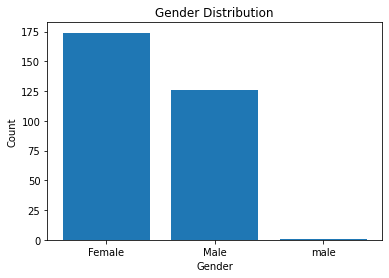

In [0]:
import matplotlib.pyplot as plt
gender_counts = hr.groupBy("Sex").count().orderBy("Sex")

# Extract the genders and counts as lists
genders = gender_counts.select("Sex").rdd.flatMap(lambda x: x).collect()
counts = gender_counts.select("count").rdd.flatMap(lambda x: x).collect()

# Plot the bar chart
plt.bar(genders, counts)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

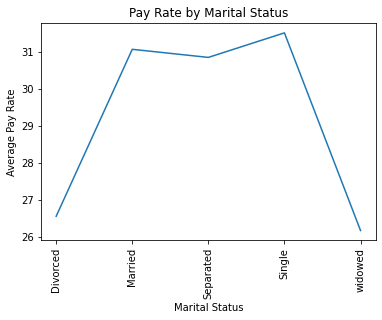

In [0]:
pay_rate_by_marital = hr.groupBy("MaritalDesc").avg("Pay_Rate").orderBy("MaritalDesc")
# Extract the marital statuses and pay rates as lists
marital_statuses = pay_rate_by_marital.select("MaritalDesc").rdd.flatMap(lambda x: x).collect()
pay_rates = pay_rate_by_marital.select("avg(Pay_Rate)").rdd.flatMap(lambda x: x).collect()

# Plot the line chart
plt.plot(marital_statuses, pay_rates)
plt.xlabel("Marital Status")
plt.ylabel("Average Pay Rate")
plt.title("Pay Rate by Marital Status")
plt.xticks(rotation=90)
plt.show()

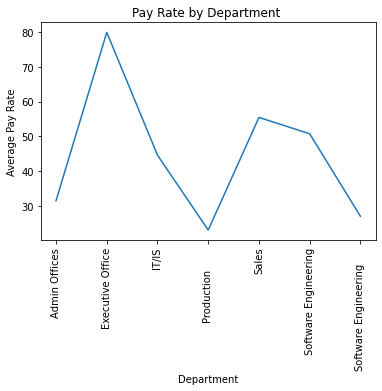

In [0]:
pay_rate_by_marital = hr.groupBy("Department").avg("Pay_Rate").orderBy("Department")
# Extract the marital statuses and pay rates as lists
marital_statuses = pay_rate_by_marital.select("Department").rdd.flatMap(lambda x: x).collect()
pay_rates = pay_rate_by_marital.select("avg(Pay_Rate)").rdd.flatMap(lambda x: x).collect()

# Plot the line chart
plt.plot(marital_statuses, pay_rates)
plt.xlabel("Department")
plt.ylabel("Average Pay Rate")
plt.title("Pay Rate by Department ")
plt.xticks(rotation=90)
plt.show()

In [0]:
filter_df = hr.filter(hr["Sex"]=="Male")

In [0]:
filter_df.show(5)

+--------------------+---------------+-----+----+----+---+----+-----------+-------------------+---------------+--------------------+------------+-------------------+--------------------+--------------------+-------------+--------------------+--------+------------------+------------------+--------------------+-------+
|       Employee_Name|Employee_Number|State| Zip| DOB|Age| Sex|MaritalDesc|        CitizenDesc|Hispanic_Latino|            RaceDesc|Date_of_Hire|Date_of_Termination|     Reason_For_Term|   Employment_Status|   Department|            Position|Pay_Rate|      Manager_Name|   Employee_Source|   Performance_Score|Country|
+--------------------+---------------+-----+----+----+---+----+-----------+-------------------+---------------+--------------------+------------+-------------------+--------------------+--------------------+-------------+--------------------+--------+------------------+------------------+--------------------+-------+
|LaRotonda, William  |     1106026572|   MA

In [0]:
filter_df.select("Sex","Employee_Number","Zip","State","Department").show(10)

+----+---------------+-----+-----+-------------+
| Sex|Employee_Number|  Zip|State|   Department|
+----+---------------+-----+-----+-------------+
|Male|     1106026572| 1460|   MA|Admin Offices|
|Male|     1302053333| 2703|   MA|Admin Offices|
|Male|     1102024115| 1460|   MA|Admin Offices|
|Male|     1206043417| 2045|   MA|Admin Offices|
|Male|     1410071156| 1960|   MA|        IT/IS|
|Male|     1406068403|78230|   TX|        IT/IS|
|Male|     1102023965| 2747|   MA|        IT/IS|
|Male|     1203032255| 1810|   MA|        IT/IS|
|Male|     1111030148| 2452|   MA|        IT/IS|
|Male|      808010278| 2110|   MA|        IT/IS|
+----+---------------+-----+-----+-------------+
only showing top 10 rows



In [0]:
filter_df = hr.filter((hr["Sex"]=="Male") & (hr["Department"]=="Sales"))

In [0]:
filter_df.select("Employee_Name","Pay_Rate","RaceDesc","Hispanic_Latino").show(10)

+--------------------+--------+--------------------+---------------+
|       Employee_Name|Pay_Rate|            RaceDesc|Hispanic_Latino|
+--------------------+--------+--------------------+---------------+
|        Buck, Edward|      55|               White|             No|
|    Digitale, Alfred|      56|American Indian o...|             No|
|      Fraval, Maruk |      55|Black or African ...|             No|
|     Friedman, Gerry|      55|   Two or more races|            Yes|
|   Gonzales, Ricardo|      55|               White|             No|
|     Guilianno, Mike|      55|   Two or more races|             No|
|       Jeremy Prater|      56|               White|             No|
|Khemmich, Barthol...|      55|               White|             No|
|    Leruth, Giovanni|      55|Black or African ...|             No|
|     Martins, Joseph|      56|Black or African ...|             No|
+--------------------+--------+--------------------+---------------+
only showing top 10 rows



In [0]:
sorted_df = filter_df.orderBy("Pay_Rate")
sorted_df.select("Employee_Name","Pay_Rate","RaceDesc","CitizenDesc","Position","Performance_Score").show(10)

+--------------------+--------+--------------------+-----------+------------------+--------------------+
|       Employee_Name|Pay_Rate|            RaceDesc|CitizenDesc|          Position|   Performance_Score|
+--------------------+--------+--------------------+-----------+------------------+--------------------+
|        Buck, Edward|      55|               White| US Citizen|Area Sales Manager|         Fully Meets|
|      Fraval, Maruk |      55|Black or African ...| US Citizen|Area Sales Manager|         Fully Meets|
|     Friedman, Gerry|      55|   Two or more races| US Citizen|Area Sales Manager|         Fully Meets|
|   Gonzales, Ricardo|      55|               White| US Citizen|Area Sales Manager|         Fully Meets|
|     Guilianno, Mike|      55|   Two or more races| US Citizen|Area Sales Manager|         Fully Meets|
|Khemmich, Barthol...|      55|               White| US Citizen|Area Sales Manager|         Fully Meets|
|    Leruth, Giovanni|      55|Black or African ...| US

In [0]:
sorted_df = filter_df.orderBy(hr["Pay_Rate"].desc())
sorted_df.select("Employee_Name","Pay_Rate","RaceDesc","CitizenDesc","Position","Performance_Score").show(10)

+-----------------+--------+--------------------+-------------------+------------------+-----------------+
|    Employee_Name|Pay_Rate|            RaceDesc|        CitizenDesc|          Position|Performance_Score|
+-----------------+--------+--------------------+-------------------+------------------+-----------------+
| Digitale, Alfred|      56|American Indian o...|         US Citizen|Area Sales Manager|      Fully Meets|
|    Jeremy Prater|      56|               White|         US Citizen|Area Sales Manager|              PIP|
|  Martins, Joseph|      56|Black or African ...|Eligible NonCitizen|Area Sales Manager|      Fully Meets|
| Villanueva, Noah|      56|               Asian|         US Citizen|Area Sales Manager|      Fully Meets|
|      Smith, John|      56|Black or African ...|         US Citizen|     Sales Manager|Needs Improvement|
|     Buck, Edward|      55|               White|         US Citizen|Area Sales Manager|      Fully Meets|
|   Fraval, Maruk |      55|Black or 

In [0]:
deduplicated_df = hr.dropDuplicates()

In [0]:
deduplicated_df.show()

+--------------------+---------------+-----+-----+----+---+------+-----------+-------------------+---------------+--------------------+------------+-------------------+--------------------+--------------------+----------------+--------------------+--------+------------------+--------------------+--------------------+-------+
|       Employee_Name|Employee_Number|State|  Zip| DOB|Age|   Sex|MaritalDesc|        CitizenDesc|Hispanic_Latino|            RaceDesc|Date_of_Hire|Date_of_Termination|     Reason_For_Term|   Employment_Status|      Department|            Position|Pay_Rate|      Manager_Name|     Employee_Source|   Performance_Score|Country|
+--------------------+---------------+-----+-----+----+---+------+-----------+-------------------+---------------+--------------------+------------+-------------------+--------------------+--------------------+----------------+--------------------+--------+------------------+--------------------+--------------------+-------+
|   Boutwell, Bonal

In [0]:
num_rows = deduplicated_df.count()

In [0]:
num_cols = len(deduplicated_df.columns)

In [0]:
print("Number of Rows: ", num_rows)
print("Number of Columns: ", num_cols)

Number of Rows:  301
Number of Columns:  22


In [0]:
original_num_rows = hr.count()

In [0]:
original_num_cols = len(hr.columns)

In [0]:
print("Number of Rows: ", original_num_rows)
print("Number of Columns: ", original_num_cols)

Number of Rows:  301
Number of Columns:  21


In [0]:
from pyspark.sql.functions import year
df_with_year = hr.withColumn("Year", year(hr["DOB"]))


In [0]:
df_with_year.show()

+--------------------+---------------+-----+-----+----+---+------+-----------+-------------------+---------------+--------------------+------------+-------------------+--------------------+--------------------+----------------+--------------------+--------+------------------+--------------------+--------------------+----+
|       Employee_Name|Employee_Number|State|  Zip| DOB|Age|   Sex|MaritalDesc|        CitizenDesc|Hispanic_Latino|            RaceDesc|Date_of_Hire|Date_of_Termination|     Reason_For_Term|   Employment_Status|      Department|            Position|Pay_Rate|      Manager_Name|     Employee_Source|   Performance_Score|Year|
+--------------------+---------------+-----+-----+----+---+------+-----------+-------------------+---------------+--------------------+------------+-------------------+--------------------+--------------------+----------------+--------------------+--------+------------------+--------------------+--------------------+----+
|          Brown, Mia|     1